## Исследование данных о российском кинопрокате




Заказчик этого исследования — Министерство культуры Российской Федерации.

Ислледование направлено на **изучение рынка российского кинопроката** и выявить текущие тренды. 
В проекте будет особое внимание уделено **фильмам, которые получили государственную поддержку**. Насколько такие фильмы интересны зрителю и окупаются ли они в прокате.

В исследовании использованы данные, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Данные находятся в двух таблицах, которые будут объединены, после проведения предобработки данных будет произведен исследовательский анализ данных и исследованы фильмы, которые получили государственную поддержку.


**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#блок загрузки библиотек
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy
pd.options.display.float_format = '{:.2f}'.format
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
# код загрузки датасета

try:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    movies = pd.read_csv('/Users/vadimprimakov/Documents/Yandex_practicum/CSV/04_mkrf_movies.csv')
    
try:
    shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    shows = pd.read_csv('/Users/vadimprimakov/Documents/Yandex_practicum/CSV/04_mkrf_shows.csv') 
    
display(movies.head()) 
display(shows.head())    

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [3]:
# изучим общую информацию по предоставленным данным, выявим необходимый столбец по которому будет происходить объединение

movies.shape
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
shows.shape  
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Выявленные ошибки в типе данных общей строки puNumber**

Тип данных по общей строке различается в двух таблицах. Для корректного объединения, изменим тип данных на целочисленный, номер прокатного удостоверения состоит из цифр.

In [5]:
#movies['puNumber'] = movies['puNumber'].astype('int')
movies.loc[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Пустое значение puNumber**

При попытке изменить тип данных, выявлено пустое значение в puNumber
Такое значение одно, попытаемся восстановить данные, на сайте Министерства культуры РФ, найден номер. 
https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/472371/

In [6]:
movies['puNumber'] = movies['puNumber'].replace('нет', '111009614')
movies.loc[movies['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Неявный дубликат в puNumber**

Как оказалось, данный фильм уже существует в таблице, поэтому один можно удалить, на сайте указана дата получения прокатного удостоверения 02.09.2014, соответственно первый вариант с датой 15.05.2014 можно удалить 

In [7]:
movies = movies.drop(index=[1797])
movies = movies.reset_index(drop=True)
movies.loc[movies['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2077,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Изменение типа данных и слияние таблиц по столбцу puNumber**

Проблема исчезла, можно производить слияние, проверим добавился ли столбец "Сборы в рублях" в итоговую таблицу 

In [8]:
movies['puNumber'] = movies['puNumber'].astype('int')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
df = movies.merge(shows, on = 'puNumber', how='left')
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [10]:
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Последствия слияние таблиц по столбцу puNumber**

Перед объединением в таблице shows было 3158 строк, в новую таблицу df в столбец box_office попали 3158 значений, что говорит нам о том, что мы не потеряли данные, можно переходить к блоку предобработки.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

**Выявленные ошибки в типах данных**

    Неправильный тип данных
        - show_start_date — дата премьеры фильма - необходимый тип данных datetime
        - ratings — рейтинг фильма на КиноПоиске - необходимый тип данных float

In [12]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'],format='%Y-%m-%dT%H:%M:%S', utc=True)
display (df['show_start_date'].head(5))

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

**Изменение типа данных столбца ratings**

В процессе изменения типа данных данного столбца, выяснилось, что в некоторых строках рейтинг отображается в процентах.<br />
Предположим, что 100% соответствует рейтингу 10.0, приведем данный столбец к дробным значениям, используя это предположение.

In [13]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [14]:
df['ratings'] = df['ratings'].replace('\%', '', regex = True)
df['ratings']= df['ratings'].astype('float64') 
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings']/10
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**Поиск пропущенных значений**

Выясним в каких столбцах существуют пропуски и визуализируем данные

In [16]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [17]:
pd.DataFrame(round(df.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
refundable_support,96.000000
nonrefundable_support,96.000000
budget,96.000000
financing_source,96.000000
box_office,58.000000
ratings,13.000000
genres,13.000000
producer,8.000000
title,0.000000
puNumber,0.000000


**Выявленные пропущенные значения**

    Данные к восстановлению
       - film_studio: 18 пропусков - заменим пропуски на данные из открытых источников;
       - production_country: 2 фильма без указания страны производства - заменим пропуски 
       на данные из открытых источников;
       - director: 9 фильмов без указания режиссера - в основном это концерты или записи 
       выступлений, данные о режиссере не критичны, заменим пропуски на "неизвестно";
       - producer: продюсер не указан для 568 фильмах - заменим пропуски на "неизвестно";
       - refundable_support, nonrefundable_support, budget, financing_source:
       только у 4% фильмов есть информация о бюджете фильма, а также об источнике 
       государственного финансирования и объёмах возвратных и невозвратных средств 
       государственной поддержки. Получается, что данные фильмы не были профинансированы 
       государством. Количество пропущенных значений одинаковы по данным столбцам, поэтому
       пропуски трогать не будем;
       - ratings: для 966 фильмов рейтинги не указаны - возможно, для формирования рейтинга 
       на Кинопоиске недостаточно оценок у фильмов, оставим пропуски, как есть;
       - genres: 975 фильмов нет информации о жанре - заменим пропуски на "неизвестно", 
       для дальнейших исследований, данные не потребуются;
       - box_office: 4327 записи о кассовых сборах не заполнены. Проверим, в таблице 
       movies после удаления неявного дубликата оставалось 7485 значений, в таблице 
       shows 3158 значений, после объединения получилось 7485-3518=4327 не заполненных 
       строки, то есть все имеющиеся строки в таблице shows мы использовали, других 
       данных у нас нет, оставим пропуски, как есть.

In [18]:
df.loc[df['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.00
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc[1293, 'film_studio'] = '7 разных студий'
df.loc[4440, 'film_studio'] = 'Пространство идей'
df.loc[6104, 'film_studio'] = 'Домашняя студия'
df.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
df.loc[6378, 'film_studio'] = 'Домашняя студия'
df.loc[6379, 'film_studio'] = 'Домашняя студия'
df.loc[6398, 'film_studio'] = 'Домашняя студия'
df.loc[6484, 'film_studio'] = 'Домашняя студия'
df.loc[6493, 'film_studio'] = 'Домашняя студия'
df.loc[6496, 'film_studio'] = 'Домашняя студия'
df.loc[6497, 'film_studio'] = 'Домашняя студия'
df.loc[6498, 'film_studio'] = 'Домашняя студия'
df.loc[6506, 'film_studio'] = 'Домашняя студия'
df.loc[6510, 'film_studio'] = 'Домашняя студия'
df.loc[6637, 'film_studio'] = 'Домашняя студия'
df.loc[6638, 'film_studio'] = 'Домашняя студия'
df.loc[6661, 'film_studio'] = 'Домашняя студия'
df.loc[6721, 'film_studio'] = 'Домашняя студия'

In [20]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [21]:
df.loc[3185, 'production_country'] = 'Россия'
df.loc[4440, 'production_country'] = 'Россия'

In [22]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [23]:
missing_list = ['director', 'producer', 'genres']
for i in missing_list:
    df[i]=df[i].fillna('неизвестно')

In [24]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                      0
box_office               4327
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Поиск дубликатов**

Выясним существуют ли дубликаты, будем искать явные и неявные дубликаты, особенно нас интересует столбец с номерами прокатных удостоверений, там дубликатов быть не должно

In [25]:
df.duplicated().sum()

0

In [26]:
df['puNumber'].duplicated().sum()

2

In [27]:
df[df.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


**Обработка дубликатов прокатных удостоверений 221154310 и 221054410**

Проверим сайт министерства культуры

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522107/ <br /> 
Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс - НПУ 221154310 от 17.12.2010

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522105/ <br /> 
Как жениться и остаться холостым - НПУ 221154310 от 17.12.2010

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/527875/ <br /> 
Анализируй это! - НПУ 221054410 от 25.05.2010

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/521829/ <br /> 
Анализируй то - НПУ 221147210 от 15.12.2010

Номера последних двух фильмом действительно совпадают, для корректного использования возьмем наиболее свежее прокатного удостоверение для фильма "Анализируй то"

При заполнении правильных номеров прокатных удостоверений и даты выхода в прокат, произошла замена типа данных, вернем обратно на int и datetime

In [28]:
df.loc[4637, 'puNumber'] = 221154310
df.loc[4637, 'show_start_date'] = '2010-12-17 12:00:00+00:00'
df.loc[5067, 'puNumber'] = 221147210
df.loc[5067, 'show_start_date'] = '2010-12-15 12:00:00+00:00'

In [29]:
display(df[df.duplicated(['puNumber'])])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [30]:
df['puNumber'] = df['puNumber'].astype('int')
df['show_start_date'] = pd.to_datetime(df['show_start_date'], utc=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [32]:
df[df['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [33]:
df[df['title'] == df.loc[4637, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN


**Обработка дубликатов названий фильмов**

Одни и те же картины прокатывались в кинотеатрах несколько раз, и для каждого из выпуска, выдавалось новое прокатное удостоверение, предлагаю оставить повторы названий как есть, но для исследования, возможно, понадобятся только те значения, в которых имеются данные о box_office.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Проверка категоральных значений**

Выясним какая общая проблема встречается почти во всех категориальных столбцах, исправим проблемные значения в поле type, <br />
удалив из столбца type лишние пробелы, которые встречаются в начале и в конце строки.

Использование всех стран из столбца production_country для исследования нецелесообразно, корректно ли будет использовать, только первую страну из списка, необходимо уточнить у заказчика исследования. В дальнейшем (столбец главный режиссёр и основной жанр) нам рекомендуют считать, что первое указанное значение и есть "главный" показатель.

In [34]:
df['type'] = df['type'].str.strip()

In [35]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [36]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [37]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев',
       'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников',
       'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит',
       'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон',
       'Р.Быков', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков',
       'Н.Михалков', 'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер',
       'Оливье Маршал', 'С.Соловьев', 'Иоахим Реннинг, Эспен Сандберг',
       'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М.Ромм',
       'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт, Дэвид Шнейдер',
       'С.Самсонов', 'Айрон Блейз, Роберт Уокер', 'К.Шахн

In [38]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
       'Джон Пенотти, Джон Туртурро', 'Патрис Леду',
       'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг',
       'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис',
       'Саймон Чэннинг Уильямс', 'Этчи Стро, Анни Стюарт, Майк Фиггис',
       'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн',
       'Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле',
       'Филиппа Кемпбелл', 'Луис Дюкью', 'Чарльз Уэйнсток',
       'Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс',
       'Норма Хейман, Боб Хоскинс',
       'Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин',
       'Мэтью Пэйн, Джулия Пэло',
       'Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха',
       'Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас',
       'Стивен Спилберг, Люси Фишер, Дуглас Уик, Д

In [39]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [40]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [41]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [42]:
categorical_columns = ['type','production_country', 
           'director', 'producer', 'age_restriction',
           'financing_source', 'genres']

for column in categorical_columns:
    display(pd.DataFrame(df[column].value_counts().head(5)))

,type
Художественный,5908
Анимационный,829
Прочие,406
Документальный,288
Научно-популярный,53


,production_country
США,2172
Россия,1822
СССР,347
Франция,301
Великобритания,257


,director
О.Семёнова,47
Стивен Содерберг,17
Д.Червяцов,17
Ридли Скотт,16
Тиль Швайгер,14


,producer
неизвестно,568
П.Смирнов,67
"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",28
С.Сельянов,18
"Д.Ловейко, О.Кузовков",17


,age_restriction
«16+» - для детей старше 16 лет,2851
«18+» - запрещено для детей,1605
«12+» - для детей старше 12 лет,1592
«0+» - для любой зрительской аудитории,811
«6+» - для детей старше 6 лет,626


,financing_source
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


,genres
неизвестно,975
драма,476
комедия,352
"мелодрама,комедия",222
"драма,мелодрама,комедия",189


**Основная проблема категоральных столбцов**

В исследуемых данных, у нас остались "неизвестные" значения, которые мы решили не восстанавливать из-за экономии времени, отсутствие этих данных не затронут нашу оценку проектов, которые получили государственную поддержку, так как для получения такового, необходимые данные будут известны. 

Также мы видим, что столбцы: страна происхождения, режиссер, продюссер, жанр, содержат множественные значения строк, в которых рекомендуют считать, что первое указанное значение и есть "главный" показатель. 

На шаге 2.6 будет создан дополнительный столбец с именем и фамилией главного режиссёра и основным жанром фильма, для столбца страны происхождения такое решение не требуется, так как оценка фильмов с государственной поддержкой происходит для Российских кинолент или кинолент, которые из-за распределения бюджета, принято считать Российскими. 

Определение главного продюссера фильмов в данном случае, тоже не представляет ценности для исследования, в основном их количество разнится от 1-3, и выделить из их числа того или иного создателя будет некорректным.

Также стоит отметить, что возникновение разных прокатных удостоверений у фильмов с одинаковыми названиями можно объяснить получением нескольких прокатных удостоверений для одного фильма, ремейками или фильмами с одинаковыми названиями.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

**Проверка количественных значений**

Существуют фильмы с нулевым бюджетом, но при этом они получили возвратные и/или невозвратные средств государственной поддержки, такая ситуация странная, поэтому будем считать, что общий бюджет в таких ситуациях равен сумме двух этих величин, умноженный на 2. 
Согласно, статьи https://www.kinopoisk.ru/media/article/4005463/, мы можем узнать, что максимально возможная компенсация, составляет 70% бюджета, такую поддержку получают не все фильмы, поэтому для исследования примем, что собственные и привлеченные средства равны.

Пустые значения в столбце ratings приняли решение не восстанавливать, из-за трудоемкого процесса и возможного отсутствия таких значений.

Оказалось, что почти 6,5% положительных значений сборов в рублях, находятся в промежутке до 1000 рублей, что вызывает сомнения. Это может быть связано с повторным прокатом, который провалился, либо с неверно поставленной запятой.

In [43]:
numerical_group = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']
df[numerical_group].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.00,332.00,332.00,3158.00,6519.00
mean,11864457.83,48980988.89,127229716.68,76478696.16,6.49
std,24916555.26,59980117.92,188588333.12,240353122.82,1.11
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,25000000.00,42000000.00,86239.00,5.90
50%,0.00,30000000.00,68649916.00,2327987.55,6.60
75%,15000000.00,40375000.00,141985319.50,23979671.02,7.20
max,180000000.00,400000000.00,2305074303.00,3073568690.79,9.90


In [44]:
df[df['budget'] == 0].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,17.00,16.00,17.00
mean,112067204.47,16705882.35,65174674.41,0.00,5.72,163137294.43
std,1473501.27,20064784.78,61236204.09,0.00,0.92,251115991.43
min,111000415.00,0.00,0.00,0.00,4.30,1334699.40
25%,111009615.00,0.00,23000000.00,0.00,5.07,50451949.00
50%,111017315.00,10000000.00,51000000.00,0.00,5.70,72937783.20
75%,114001715.00,20000000.00,75000000.00,0.00,6.30,184487551.40
max,114006518.00,60000000.00,250000000.00,0.00,7.80,1038321489.00


In [45]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


In [46]:
def fix_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [47]:
df['budget_corrected'] = df.apply(fix_budget, axis=1)

In [48]:
len(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget_corrected']])

0

In [49]:
df['budget_corrected'] = df['budget_corrected']*2.0

In [50]:
df['budget'] = df['budget_corrected']

In [51]:
df[df['budget'] == 0].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,budget_corrected
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
del df['budget_corrected']
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [54]:
df[df['box_office'] < 1000]['title'].count()

231

In [55]:
df[df['box_office'] < 1000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия,мелодрама,криминал",380.00
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"драма,комедия",300.00
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,Ариэтти из страны лилипутов,124001211,2011-08-05 12:00:00+00:00,Анимационный,"Буена Виста Хоум Интертейнмент, Студио Гибли, ...",Япония,Хиромаса Йонебаяши,"Тошио Сузуки, Соледад Гатти-Пасуаль, Фрэнк Мар...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.90,"аниме,мультфильм,фэнтези",450.00
5240,Другой мир: Пробуждение,121024511,2011-12-27 12:00:00+00:00,Художественный,"Скрин Гемс, Лэйкшор Интертейнмент, Сатурн Филм...",США,"Мэнс Мэрлинд, Бьорн Стейн","Лен Вайзмен, Гэри Луккези, Ричард С.Райт, Том ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.30,"ужасы,фэнтези,боевик",500.00
5296,Бой с тенью-3: последний раунд,111007211,2011-10-18 12:00:00+00:00,Художественный,"ООО ""Шаман пикчерс""",Россия,А.Сидоров,неизвестно,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"боевик,драма,криминал",500.00
5342,Хранитель времени 3D,121023411,2011-12-15 12:00:00+00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,"драма,детектив,приключения",750.00


In [56]:
bo1000 = df[df['box_office'] < 1000]['title'].count()
bo0 = df[df['box_office'] == 0]['title'].count()
bo = df['box_office'].count()
percent_low_box_office = (bo1000 - bo0)/ bo
print( f'{percent_low_box_office : 0.2%}' )

 6.55%


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [57]:
df['show_start_year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


In [58]:
df.columns
df['show_start_year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [59]:
df['director_initials'] = df['director'].str.split(",").str[0]
df['main_genre'] = df['genres'].str.split(",").str[0]
df['director_initials'] = df['director_initials'].str.strip()
df['main_genre'] = df['main_genre'].str.strip()

In [60]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office',
       'show_start_year', 'director_initials', 'main_genre'],
      dtype='object')

In [61]:
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

**Расчет доли государственной поддержки**

В данном случае нам не важно, какой тип поддержки был осуществлен(возвратный и не возвратный)
Также помним о нашем допущении, что если общий бюджет не был указан, то мы считаем, что он равен сумме возвратной и невозвратной поддержки, умжноженной на два (то есть будут значения доли равные 0.5 из-за нашего допущения).

In [62]:
df['budget_ratio'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['budget_ratio'] = df['budget_ratio'].map('{:,.3f}'.format)

In [63]:
df[df['budget_ratio'] != 'nan']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre,budget_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,158823800.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.167
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,74285714.00,Министерство культуры,NaN,неизвестно,28140.00,2014,А.Якимчук,неизвестно,0.350
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,352046980.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.306
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,81148280.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.345
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,80030244.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,1960000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.255
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,380000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.263
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,1888000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.265
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,92308000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.325


In [64]:
df['budget_ratio'].unique()

array(['nan', '0.167', '0.350', '0.306', '0.345', '0.312', '0.241',
       '0.340', '0.270', '0.269', '0.176', '0.139', '0.187', '0.500',
       '0.251', '0.065', '0.315', '0.329', '0.333', '0.105', '0.060',
       '0.205', '0.125', '0.334', '0.349', '0.194', '0.264', '0.111',
       '0.168', '0.346', '0.213', '0.181', '0.310', '0.327', '0.089',
       '0.331', '0.338', '0.332', '0.215', '0.341', '0.162', '0.301',
       '0.319', '0.311', '0.150', '0.347', '0.325', '0.278', '0.184',
       '0.344', '0.336', '0.180', '0.170', '0.313', '0.297', '0.296',
       '0.085', '0.298', '0.217', '0.321', '0.165', '0.348', '0.263',
       '0.169', '0.250', '0.242', '0.257', '0.050', '0.316', '0.112',
       '0.115', '0.222', '0.254', '0.059', '0.192', '0.293', '0.183',
       '0.154', '0.300', '0.237', '0.113', '0.082', '0.061', '0.392',
       '0.238', '0.226', '0.322', '0.164', '0.309', '0.259', '0.133',
       '0.247', '0.275', '0.118', '0.320', '0.330', '0.214', '0.328',
       '0.178', '0.308

In [65]:
df['budget_ratio'] = df['budget_ratio'].astype('float64') 

### Шаг 3. Проведите исследовательский анализ данных


#### Шаг 3.1. Расчет количества фильмов в прокате по годам

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.



Выясним, сколько фильмов выходило в прокат в имеющихся годах

In [66]:
movie = df.groupby('show_start_year')['box_office'].count()
movie = movie.to_frame().reset_index()
movie.rename(columns={'show_start_year':'year', 'box_office':'movies_in_theatres'}, inplace=True)
movie

,year,movies_in_theatres
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,279
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


Выясним, сколько фильмов выходило в целом в прокат каждый год и объединим с данными о прокате в кинотеатрах и расчитаем среднее количество фильмов в год:

In [67]:
films = df.groupby('show_start_year')['title'].count()
films = films.to_frame().reset_index()
films.rename(columns={'title':'films_total'}, inplace=True)
films['movies_in_theatres'] = movie['movies_in_theatres']
films['films_in_theatres_ratio, %']=(films['movies_in_theatres']/films['films_total'])*100
films.rename(columns={'show_start_year':'year'}, inplace=True)
display(films)

print('Cреднее количество фильмов в год: %.0f' % films['films_total'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % movie['movies_in_theatres'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' % films['films_in_theatres_ratio, %'].mean(), '%')

,year,films_total,movies_in_theatres,"films_in_theatres_ratio, %"
0,2010,985,105,10.66
1,2011,622,109,17.52
2,2012,593,128,21.59
3,2013,630,184,29.21
4,2014,806,279,34.62
5,2015,705,465,65.96
6,2016,818,526,64.30
7,2017,505,357,70.69
8,2018,891,475,53.31
9,2019,930,530,56.99


Cреднее количество фильмов в год: 748
Cреднее количество фильмов в кинотеатрах в год: 316
Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.48 %


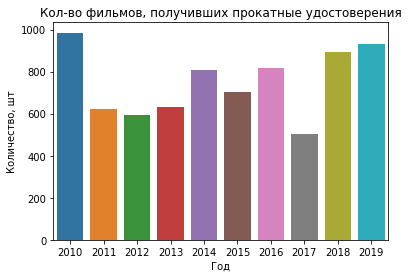

In [68]:
sns.barplot(x='year', y='films_total', data=films);
plt.title('Кол-во фильмов, получивших прокатные удостоверения');
plt.xlabel('Год');
plt.ylabel('Количество, шт');

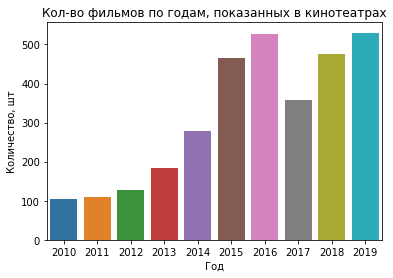

In [69]:
sns.barplot(x='year', y='movies_in_theatres', data=films);
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Количество, шт');

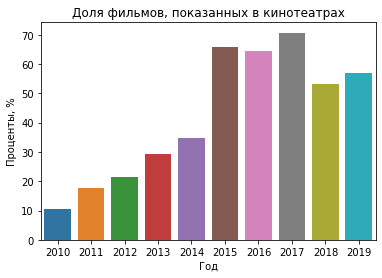

In [70]:
sns.barplot(x='year', y='films_in_theatres_ratio, %', data=films);
plt.title('Доля фильмов, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Проценты, %');

In [71]:
films.corr()

,year,films_total,movies_in_theatres,"films_in_theatres_ratio, %"
year,1.00,0.16,0.91,0.87
films_total,0.16,1.00,0.31,-0.07
movies_in_theatres,0.91,0.31,1.00,0.90
"films_in_theatres_ratio, %",0.87,-0.07,0.90,1.00


Данные о прокате в кинотеатрах не соответствуют общему значению выданных удостоверений, это означает, что часть фильмов получили удостоверение другого типа, не предполагающий кинотеатральный релиз. В среднем за имеющийся период, прокатные удостоверения получали **748** фильмов ежегодно, из них выходило в кинотеатрах почти в 2,5 раза меньше - **316** фильмов.

В целом, количество фильмов, получающих прокатные удостоверения из года в год не показывает сильной динамики, однако число фильмов, которые предназначены для проката в кинотеатрах растет, достигнув пика **530** фильмов в 2019 году. Коэффициент корреляции также говорит нам о том, что год выхода имеет прямую положительную зависимость от количества кинотеатральных релизов.



#### Шаг 3.2. Динамика проката по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?



Выясним, общую сумму сборов по годам

In [72]:
box_office_result = df.groupby('show_start_year')['box_office'].agg('sum')
box_office_result = box_office_result/1000000000
box_office_result

show_start_year
2010    0.00
2011    0.01
2012    0.01
2013    0.03
2014    7.44
2015   39.50
2016   47.87
2017   48.56
2018   49.67
2019   48.43
Name: box_office, dtype: float64

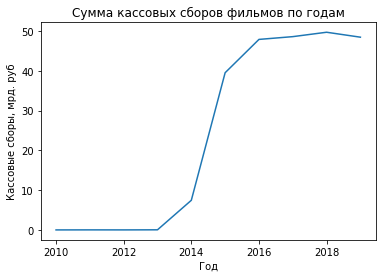

In [73]:
sns.lineplot(data=box_office_result)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Кассовые сборы, мрд. руб');
plt.show()

По получившимся данным, можно сделать вывод, что данные о сборах стали агрегироваться и собираться, начиная с 2014 года, так как данные до этого момента скорее не соответствуют действительности. Также существуют необычная тенденция, что не смотря на увеличивающееся количество фильмов в прокате, общая сумма сборов не растет в след за ними. Наилучшим для проката годом в данной выборке можно считать 2018 год - сумма сборов практически дошла до **50 мрд. руб**. Если не брать в расчет промежуток с 2010 по 2014 год, то минимальная сумма сборов была зафиксирована в 2015 году - **39,5 мрд. руб**

#### Шаг 3.3. Среднее и медианное значение сборов

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.


Построим сводную таблицу и графики для наглядности

In [74]:
df.groupby('show_start_year')['box_office'].agg(['median','mean'])

,median,mean
show_start_year,,
2010,1700.00,23130.04
2011,3000.00,129383.17
2012,5660.00,54339.24
2013,3522.50,161954.92
2014,18160.00,26684415.27
2015,4920933.00,84940570.31
2016,3846679.41,91000569.85
2017,9968340.00,136032793.33
2018,8891102.21,104565059.23


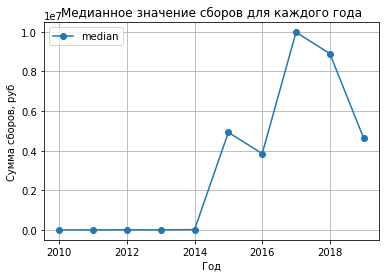

In [75]:
(
    df.groupby('show_start_year')['box_office']
    .agg(['median'])
    .plot(style='-o', grid=True, figsize=(6, 4))
)
plt.title('Медианное значение сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, руб')
plt.show()

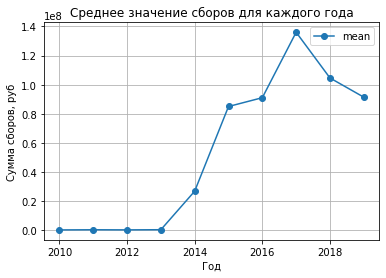

In [76]:
(
    df.groupby('show_start_year')['box_office']
    .agg(['mean'])
    .plot(style='-o', grid=True, figsize=(6, 4))
)
plt.title('Среднее значение сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, руб')
plt.show()

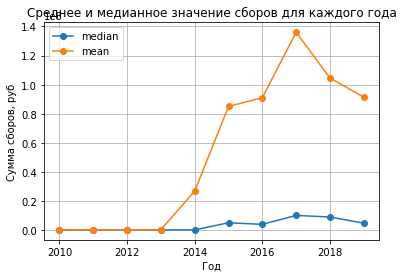

In [77]:
(
    df.groupby('show_start_year')['box_office']
    .agg(['median', 'mean'])
    .plot(style='-o', grid=True, figsize=(6, 4))
)
plt.title('Среднее и медианное значение сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, руб')
plt.show()

Медианное значение по кассовым сборам сильно отличается от среднего значения за каждый год. Это свидетельствует о том, что есть существуют фильмы с высокими сборами, которые влияют на среднюю величину. В целом для выводов о доходности вышедшего фильма лучше использовать медианное значение. По данным можно отметить, что в 2017 году получен наилучший показатель - каждый вышедший в кинотеатре фильм в этом году заработал - **10 млн. руб**

#### Шаг 3.4. Влияние возрастных ограничений

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.


Как мы уже выяснили ранее, период с 2015 по 2019 год наиболее подходит для анализа наших данных. Отфильтруем значения таблицы, используя условия логической индексации

In [78]:
positive_years = df[df['show_start_year'] >= 2015]['show_start_year']

df.pivot_table(index=positive_years, columns = 'age_restriction',values='box_office')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015.00,9719348.16,186521671.35,67667386.13,41153851.27,164184893.80
2016.00,3664118.26,148834713.71,91563453.53,44992912.71,172187800.12
2017.00,76532976.67,191498235.63,154917709.92,65656432.52,268580936.57
2018.00,6489800.42,212944651.65,105792322.74,48939025.15,148602567.99
2019.00,5915355.61,149178809.10,71648421.26,55310362.31,158673440.13


In [79]:
(
    df.pivot_table(index=positive_years, columns = 'age_restriction',values='box_office')
    .apply (['min', 'max'])   
)

,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
min,3664118.26,148834713.71,67667386.13,41153851.27,148602567.99
max,76532976.67,212944651.65,154917709.92,65656432.52,268580936.57


In [80]:
df.query('show_start_year >= 2015').groupby('age_restriction')['box_office'].sum().sort_values(ascending=False)

age_restriction
«16+» - для детей старше 16 лет          76034733643.63
«12+» - для детей старше 12 лет          60619446628.33
«6+» - для детей старше 6 лет            55798610799.68
«18+» - запрещено для детей              40759615572.12
«0+» - для любой зрительской аудитории     809077425.97
Name: box_office, dtype: float64

In [81]:
box_office_age = df.query('show_start_year >= 2015').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
box_office_age['box_office'] = box_office_age['box_office']/1000000
box_office_age.rename(columns={'show_start_year':'Год'
                               ,'age_restriction': 'Возрастное ограничение'
                               ,'box_office':'Сборы, млн. руб'}, inplace=True)
box_office_age

,Год,Возрастное ограничение,"Сборы, млн. руб"
0,2015,«0+» - для любой зрительской аудитории,379.05
1,2015,«12+» - для детей старше 12 лет,13616.08
2,2015,«16+» - для детей старше 16 лет,11368.12
3,2015,«18+» - запрещено для детей,5432.31
4,2015,«6+» - для детей старше 6 лет,8701.80
5,2016,«0+» - для любой зрительской аудитории,150.23
6,2016,«12+» - для детей старше 12 лет,12204.45
7,2016,«16+» - для детей старше 16 лет,16664.55
8,2016,«18+» - запрещено для детей,6793.93
9,2016,«6+» - для детей старше 6 лет,12053.15


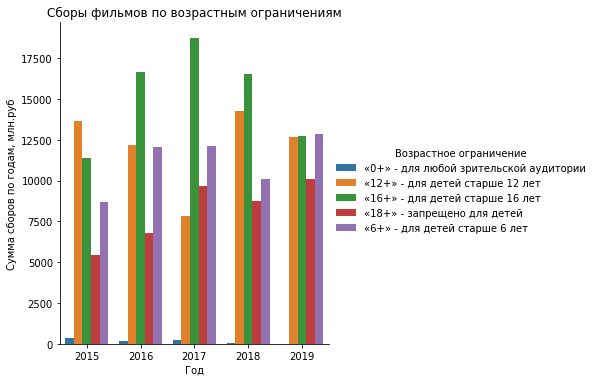

In [82]:
box_office_age_gr = sns.catplot(x='Год', y='Сборы, млн. руб', hue='Возрастное ограничение', data=box_office_age, kind='bar');
plt.title('Сборы фильмов по возрастным ограничениям');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам, млн.руб');

In [83]:
(
pd.DataFrame(df[(df['show_start_year'] >= 2015) & (df['show_start_year'] <= 2019)]
             .pivot_table(index='age_restriction', values='box_office', aggfunc=['sum', 'median', 'mean'])
             .reset_index()
             .rename(columns={'age_restriction':'Возрастное ограничение'}))
)

,Возрастное ограничение,sum,median,mean
,,box_office,box_office,box_office
0,«0+» - для любой зрительской аудитории,809077425.97,2943318.70,8890960.72
1,«12+» - для детей старше 12 лет,60619446628.33,5065044.25,174193812.15
2,«16+» - для детей старше 16 лет,76034733643.63,5600007.00,94453085.27
3,«18+» - запрещено для детей,40759615572.12,6154439.17,51464161.08
4,«6+» - для детей старше 6 лет,55798610799.68,13736207.98,176020854.26


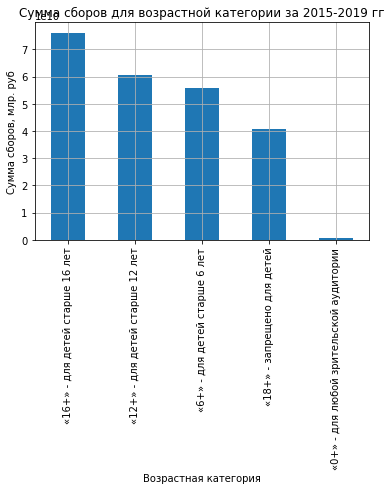

In [84]:
(
    df.query('show_start_year >= 2015')
    .groupby('age_restriction')['box_office'].sum()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(6, 4))
)
plt.title('Сумма сборов для возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млр. руб')
plt.show()

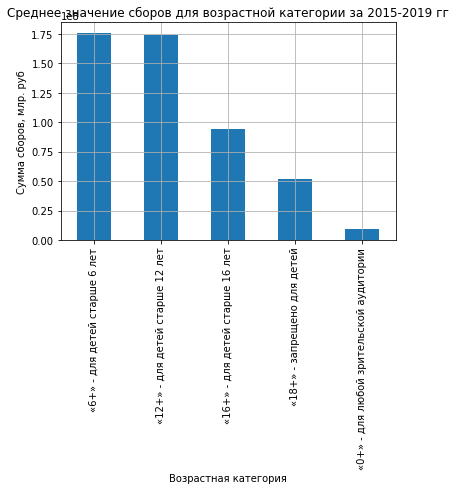

In [85]:
(
    df.query('show_start_year >= 2015')
    .groupby('age_restriction')['box_office'].mean()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(6, 4))
)
plt.title('Среднее значение сборов для возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млр. руб')
plt.show()

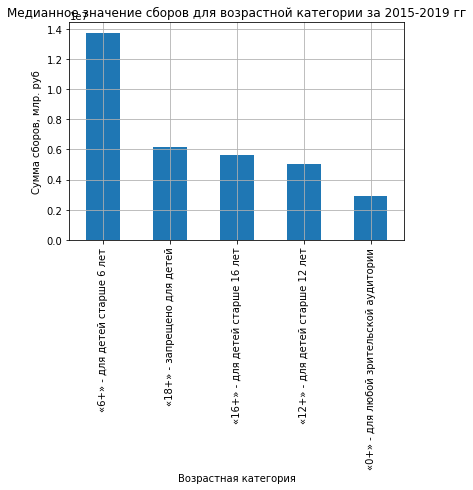

In [86]:
(
    df.query('show_start_year >= 2015')
    .groupby('age_restriction')['box_office'].median()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(6, 4))
)
plt.title('Медианное значение сборов для возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млр. руб')
plt.show()

По полученным данным можно сделать вывод, что наибольшей популярностью пользуются фильмы с рейтингом 16+, за редким исключением лидирует эта категория, в 2015 году вперед вырвалась категория 12+, в 2019 году 6+. Данные категории получают сборы значительно выше, чем 0+ и 18+, так как нацелены на более широкую аудиторию. Среднее значение сборов за выбранный отрезок времени для категории фильмов 6+ и 12+ практически совпадает, а медианные сборы фильмов 6+ выше остальных, скорее всего это связано, с тем, что такие фильмы посещают семьями, а только один ребенок.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Нам известны 332 фильма, которые получили гос. поддержку, и полный бюджет фильма, для того чтобы ответить на вопросы данного шага, выделим эти фильмы в отдельную переменную budget_movies, обнаружили, что 14 значений не имеют данных о сборах, проверим, можно ли это исправить, или эти фильмы не предназначались для проката (курс доллара возьмем равным 65).

In [87]:
budget_movies = df[df['budget'].isna() == False].copy()
len(budget_movies)

332

In [88]:
budget_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre,budget_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,158823800.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.17
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,74285714.00,Министерство культуры,NaN,неизвестно,28140.00,2014,А.Якимчук,неизвестно,0.35
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,352046980.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.31
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,81148280.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.34
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,80030244.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,1960000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.26
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,380000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.26
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,1888000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.27
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,92308000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.33


In [89]:
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(budget_movies['puNumber']))
print('Кол-во уникальных фильмов с гос.поддержкой:', len(budget_movies['title'].unique()))

Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 332
Кол-во уникальных фильмов с гос.поддержкой: 332


In [90]:
budget_movies[budget_movies['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre,budget_ratio
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,25000000.00,83997968.00,Министерство культуры,6.30,драма,NaN,2015,А.Галибин,драма,0.30
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,10000000.00,122000000.00,Министерство культуры,5.20,мелодрама,NaN,2017,А.Сурикова,мелодрама,0.08
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,11520000.00,37412160.00,Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,0.31
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,25000000.00,89200000.00,Министерство культуры,7.20,"детский,комедия",NaN,2017,Е.Соколов,детский,0.28
6475,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,25000000.00,79400000.00,Министерство культуры,5.20,"драма,криминал",NaN,2019,С.Черников,драма,0.32
6708,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,неизвестно,«12+» - для детей старше 12 лет,0.00,30000000.00,93882280.00,Министерство культуры,6.10,"драма,военный,история",NaN,2019,А.Золотухин,драма,0.32
6967,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,40000000.00,123142898.00,Министерство культуры,5.80,"драма,история,биография",NaN,2019,Ю.Разыков,драма,0.33
7008,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,25000000.00,121337152.00,Министерство культуры,4.90,"драма,криминал,детектив",NaN,2019,П.Левченко,драма,0.21
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,3000000.00,66000000.00,Министерство культуры,8.00,семейный,NaN,2019,А.Попова,семейный,0.04
7228,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,35000000.00,115752000.00,Министерство культуры,6.60,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,0.30


1) Золотая рыбка (2015) - релиз на ТВ <br />
2) Любовь и Сакс - цифровой релиз <br />
3) Колобанга. Только для пользователей Интернета (26 серий) - цифровой релиз <br />
4) Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323 - релиз на ТВ <br />
5) Зима - https://www.kinopoisk.ru/film/1039764/ - сборы 21743 дол * 65 = 1 413 295 руб <br />
6) Мальчик русский (2018) - https://www.kinopoisk.ru/film/1046004/ - сборы 29398 дол * 65 = 1 910 870 руб <br />
7) Танец с саблями (2018) - https://www.kinopoisk.ru/film/958470/ - сборы 43011 дол *65 = 2 798 715 руб <br />
8) Куратор (2019) - https://www.kinopoisk.ru/film/1261583/ - сборы 2382 дол * 65 = 154830 руб <br />
9) Байкал - Сердце мира 3D - https://www.kinopoisk.ru/film/1108385/ - сборы 235 737 дол * 65 = 15 322 905 руб <br />
10) На Луне (2019) - https://www.kinopoisk.ru/film/1311137/ - сборы 27190 дол * 65 = 1 767 250 руб <br />
11) Кроличья лапа (2019) - https://www.kinopoisk.ru/film/1445245/ - сборы 14985 дол * 65 = 974 025 руб <br />
12) Вторжение (2019) - https://www.kinopoisk.ru/film/1045582/ - сборы 32 649 672 дол * 65 = 2 122 228 680 руб <br />
13) Я свободен (2019) - https://www.kinopoisk.ru/film/1289032/ - цифровой релиз <br />
14) (НЕ)идеальный мужчина (2019) - https://www.kinopoisk.ru/film/1162847/ - сборы 15 767 966 дол * 65 = 1 024 917 790 руб <br />

In [91]:
budget_movies = budget_movies.drop(index=[2799])
budget_movies = budget_movies.drop(index=[3336])
budget_movies = budget_movies.drop(index=[3710])
budget_movies = budget_movies.drop(index=[5660])
budget_movies.loc[6475, 'box_office'] = 1413295
budget_movies.loc[6708, 'box_office'] = 1910870
budget_movies.loc[6967, 'box_office'] = 2798175
budget_movies.loc[7008, 'box_office'] = 154830
budget_movies.loc[7179, 'box_office'] = 15322905
budget_movies.loc[7228, 'box_office'] = 1767250
budget_movies.loc[7343, 'box_office'] = 974025
budget_movies.loc[7473, 'box_office'] = 2122228680
budget_movies = budget_movies.drop(index=[7475])
budget_movies.loc[7477, 'box_office'] = 1024917790
movies = movies.reset_index(drop=True)
budget_movies[budget_movies['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre,budget_ratio


Для дальнейших вычислений и графиков, создадим два столбца, <br /> 
total_support - сумма государственной поддержки(возвратная и невозвратная части);  <br /> 
profit - прибыль/убыток от релиза киноленты (сборы за вычетом бюджета).

In [92]:
budget_movies['total_support'] = budget_movies['refundable_support'] + budget_movies['nonrefundable_support']
budget_movies['profit'] = budget_movies['box_office'] - budget_movies['budget']
budget_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,director_initials,main_genre,budget_ratio,total_support,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.17,26500000.00,-158458446.40
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,неизвестно,28140.00,2014,А.Якимчук,неизвестно,0.35,26000000.00,-74257574.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.31,107847945.00,-332089948.50
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.34,28000000.00,-81092362.50
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.31,25000000.00,-79798144.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,...,Фонд кино,6.80,комедия,3073568690.79,2019,К.Шипенко,комедия,0.19,60000000.00,2753568690.79
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.26,500000000.00,-1242296814.47
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,...,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.26,100000000.00,121069235.00
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,5.70,"фантастика,боевик",2122228680.00,2019,Ф.Бондарчук,фантастика,0.27,500000000.00,234228680.00


In [93]:
budget_movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,budget_ratio,total_support,profit
count,327.00,327.00,327.00,327.00,311.00,327.00,327.00,327.00,327.00,327.00
mean,111287715.46,12045871.56,49419474.96,265564381.28,6.02,138486230.57,2016.72,0.27,61465346.52,-127078150.72
std,866109.52,25063214.91,60324130.77,376487211.00,1.15,352037472.69,1.64,0.10,73129769.04,392779169.72
min,111000115.00,0.00,0.00,12000000.00,1.00,1550.00,2013.00,0.02,3000000.00,-4276551546.41
25%,111004867.00,0.00,25000000.00,92307733.00,5.30,1241449.00,2015.00,0.19,25950000.00,-184498289.56
50%,111010315.00,0.00,30000000.00,148143836.00,6.20,15078858.60,2017.00,0.31,35000000.00,-98719764.50
75%,111017415.50,15000000.00,43250000.00,300008573.00,6.70,106231715.52,2018.00,0.33,60000000.00,-68735921.75
max,114010018.00,180000000.00,400000000.00,4610148606.00,9.40,3073568690.79,2019.00,0.50,500000000.00,2753568690.79


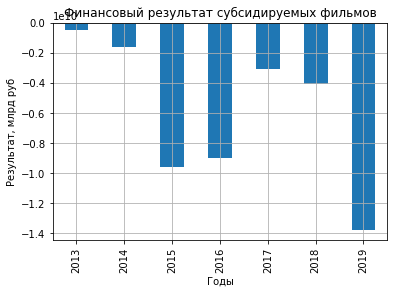

In [94]:
# Построим  график, отражающий прибыльность фильмов с гос.поддержкой по годам:
budget_movies.groupby('show_start_year')['profit'].sum().plot(kind='bar', grid=True)
plt.title('Финансовый результат субсидируемых фильмов')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд руб');

Среднее соотношение государственных вложений к бюджету составляет **27%**, <br /> 
В среднем картины с государственной поддержкой провальны, из-за крупных вложений, сумма убытков переваливает за 120 млн. руб  <br /> 
Более **75% фильмов убыточны**, однако есть и блокбастер, который смог преодолеть планку 2,7 млд. руб. <br /> 
Не смотря на такие всплески, в целом субсидируемые фильмы убыточны.

In [95]:
budget_movies.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    85
2016    60
2017    39
2018    56
2019    69
Name: total_support, dtype: int64

In [96]:
#исключим из анализа данные за 2013, 2014 год из-за малого количества значений
budget_movies = budget_movies[budget_movies['show_start_year'] > 2014]

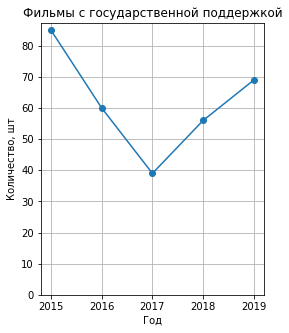

In [97]:
budget_movies.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-', figsize=(4, 5));
plt.title('Фильмы с государственной поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество, шт');

In [98]:
budget_per_year = budget_movies.groupby('show_start_year')['total_support'].sum()
budget_per_year = budget_per_year/1000000000
budget_per_year.sort_values(ascending=False)

show_start_year
2019   4.87
2016   4.29
2015   3.63
2018   3.45
2017   3.15
Name: total_support, dtype: float64

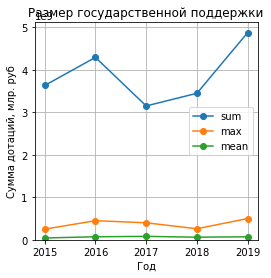

In [99]:
budget_movies.groupby('show_start_year')['total_support'].agg(
    ['sum', 'max', 'mean']).plot(grid=True, ylim=0, style='o-', figsize=(4, 4));
plt.title('Размер государственной поддержки');
plt.xlabel('Год');
plt.ylabel('Сумма дотаций, млр. руб');

После минимального размера общей суммы гос. поддержки, за рассматриваемый период, достигнутой в 2017 году, к 2019 размер гос. поддержки приблизился к 5 млр. руб. Причем, один фильм получил поддержку сразу 0,5 млр. руб.

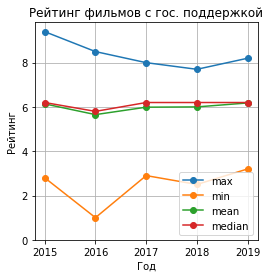

In [100]:
budget_movies.groupby('show_start_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-', figsize=(4, 4))
plt.title('Рейтинг фильмов с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Рейтинг');

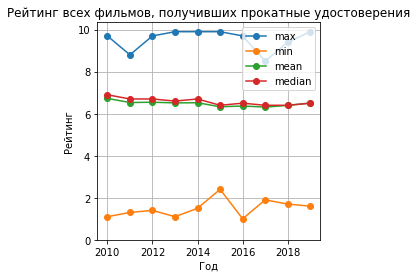

In [101]:
df.groupby('show_start_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-', figsize=(4, 4))
plt.title('Рейтинг всех фильмов, получивших прокатные удостоверения');
plt.xlabel('Год');
plt.ylabel('Рейтинг');

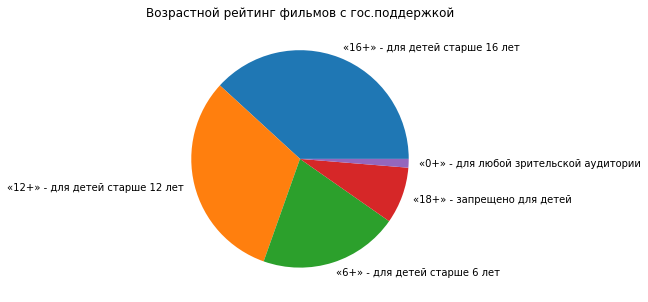

In [102]:
# Определим какой возрастной рейтинг у фильмов получающих гос.поддержку:
budget_movies['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(5, 5))
plt.title('Возрастной рейтинг фильмов с гос.поддержкой')
plt.ylabel("");

In [103]:
budget_movies['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           118
«12+» - для детей старше 12 лет            97
«6+» - для детей старше 6 лет              64
«18+» - запрещено для детей                26
«0+» - для любой зрительской аудитории      4
Name: age_restriction, dtype: int64

In [104]:
budget_movies['type'].value_counts()

Художественный    279
Анимационный       29
Документальный      1
Name: type, dtype: int64

In [105]:
# Выведем имена главных режиссеров, чьи фильмы получили максимальные оценки зрителей, а также их жанры:
(
    budget_movies
    .query('ratings > 7')
    .groupby(['director_initials', 'type'])['ratings']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

director_initials                  type          
С.Мокрицкий                        Художественный    2
Р.Давлетьяров                      Художественный    2
А.Андрианов                        Художественный    1
Р.Артемьев                         Художественный    1
М.Демченко                         Художественный    1
М.Михайлова                        Художественный    1
М.Морсков                          Художественный    1
Н.Бондарчук                        Художественный    1
Н.Лебедев                          Художественный    1
Н.Степанова при участии С.Иванова  Художественный    1
Name: ratings, dtype: int64

In [106]:
(
    budget_movies
    .pivot_table(index= 'main_genre', values = ['total_support'])
    .sort_values(by='total_support',ascending=False)
    .head(10)
)

,total_support
main_genre,
история,255000000.00
спорт,151666666.67
фантастика,138100000.00
приключения,99428571.43
детектив,97000000.00
фэнтези,93900000.00
криминал,93333333.33
мультфильм,82068965.52
мюзикл,60113279.75


Относительно рейтинга фильмов, получающих гос. поддержку, среднее и медианное значение на всем рассматриваемом периоде идут рука об руку, около **6 баллов**, со взлетами до 9 баллов и провалами до 1 балла. При распределении государственной поддержки, предпочтения отдаются **художественным** фильмам с рейтингом **12+ и 16+** в **историческом, спортивном, фантастическом** жанрах.  А режиссеры **С.Мокрицкий и Р.Давльетьяров** помимо получения гос.субсидий получают и любовь зрителей, их фильмы оцениваются в среднем выше остальных.

In [107]:
budget_movies.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,budget_ratio,total_support,profit
puNumber,1.00,0.23,0.02,0.10,-0.09,0.04,0.03,-0.06,0.10,-0.06
refundable_support,0.23,1.00,0.36,0.65,0.01,0.36,0.06,0.01,0.64,-0.31
nonrefundable_support,0.02,0.36,1.00,0.62,0.13,0.51,0.11,0.14,0.95,-0.13
budget,0.10,0.65,0.62,1.00,0.09,0.42,0.16,-0.28,0.73,-0.58
ratings,-0.09,0.01,0.13,0.09,1.00,0.12,0.04,-0.08,0.11,0.02
box_office,0.04,0.36,0.51,0.42,0.12,1.00,0.12,-0.07,0.54,0.50
show_start_year,0.03,0.06,0.11,0.16,0.04,0.12,1.00,-0.11,0.11,-0.04
budget_ratio,-0.06,0.01,0.14,-0.28,-0.08,-0.07,-0.11,1.00,0.12,0.21
total_support,0.10,0.64,0.95,0.73,0.11,0.54,0.11,0.12,1.00,-0.22
profit,-0.06,-0.31,-0.13,-0.58,0.02,0.50,-0.04,0.21,-0.22,1.00


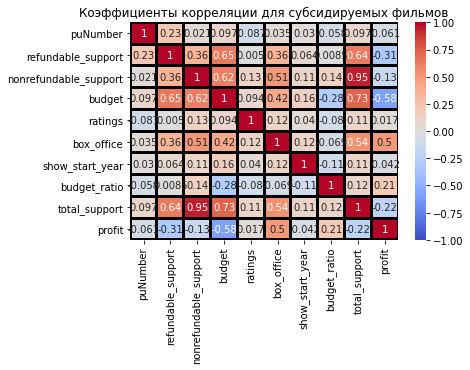

In [108]:
sns.heatmap(
    budget_movies.corr(), annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black',
).set_title('Коэффициенты корреляции для субсидируемых фильмов');


Прослеживается тесная связь между общим размером субсидий и бюджетом фильма. И не такие очевидные средние связи между сборами и общим размером субсидий - коэфф. корреляции 0.54. Сборами и невозвратными субсидиями - коэфф. корреляции 0.51.

Выясним, каким режиссерам отдают предпочтение при распределении субсидий.

In [109]:
favorite_dir = (
                budget_movies
                .groupby('director_initials')['total_support', 'profit', 'ratings']
                .agg(['count', 'sum', 'mean'])
)
favorite_dir.columns = ['_'.join(col).strip() for col in favorite_dir.columns.values]
favorite_dir.sort_values(by='total_support_sum', ascending=False).head(10)

/tmp/ipykernel_196/1363273708.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  budget_movies


,total_support_count,total_support_sum,total_support_mean,profit_count,profit_sum,profit_mean,ratings_count,ratings_sum,ratings_mean
director_initials,,,,,,,,,
Ф.Бондарчук,2,750000000.00,375000000.00,2,772550169.00,386275084.50,2,11.30,5.65
Н.Хомерики,3,660000000.00,220000000.00,3,-1269266381.77,-423088793.92,3,18.10,6.03
А.Кравчук,1,500000000.00,500000000.00,1,-1242296814.47,-1242296814.47,1,6.00,6.00
А.Мизгирев,1,450000000.00,450000000.00,1,-1004115932.40,-1004115932.40,1,6.60,6.60
Н.Лебедев,1,442104482.00,442104482.00,1,131687656.00,131687656.00,1,7.60,7.60
А.Мегердичев,1,400000000.00,400000000.00,1,1599301762.00,1599301762.00,1,7.50,7.50
Р.Давлетьяров,4,352000000.00,88000000.00,4,-909507593.06,-227376898.27,4,28.60,7.15
Д.Дьяченко,4,351000000.00,87750000.00,4,843508010.12,210877002.53,4,22.60,5.65
Д.Киселев,2,350000000.00,175000000.00,2,-5864486.00,-2932243.00,2,13.30,6.65


In [110]:
favorite_dir.sort_values(by='profit_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,profit_count,profit_sum,profit_mean,ratings_count,ratings_sum,ratings_mean
director_initials,,,,,,,,,
К.Шипенко,2,285000000.00,142500000.00,2,2518780553.79,1259390276.89,2,14.20,7.10
А.Мегердичев,1,400000000.00,400000000.00,1,1599301762.00,1599301762.00,1,7.50,7.50
О.Трофим,1,85000000.00,85000000.00,1,1148561353.89,1148561353.89,0,0.00,NaN
А.Сидоров,1,180000000.00,180000000.00,1,1144184570.52,1144184570.52,1,6.50,6.50
Д.Дьяченко,4,351000000.00,87750000.00,4,843508010.12,210877002.53,4,22.60,5.65
Ф.Бондарчук,2,750000000.00,375000000.00,2,772550169.00,386275084.50,2,11.30,5.65
М.Бальчюнас (псевдоним М.Вайсберг),1,100000000.00,100000000.00,1,724622786.00,724622786.00,1,4.50,4.50
А.Черномазов (псевдоним Алексей Нужный),1,30000000.00,30000000.00,1,458164012.74,458164012.74,1,6.90,6.90
А.Першин (псевдоним Ж.Крыжовников),1,63000000.00,63000000.00,1,421790389.40,421790389.40,1,4.70,4.70


**Ф.Бондарчук** в суммарном выражении, получил максимальную гос. поддержку - на 2 фильма было выделено **750 млн. руб**, которые смогли окупиться, но рейтинг у фильмов не высокий, а ниже среднего. **Н.Хомерики**	получил на три фильма **660 млн. руб**, но окупиться так и не смог, затраты на производство сильно превзошли сборы фильмов, **проваливших прокат со средним рейтингом 6.0**. Любимцу зрителей **Р.Давлетьярову**, которому профинансировали 4 фильма, на общую сумму **352 млн. руб**, высокий рейтинг его картин, не помог окупиться в прокате, общий бюджет выше реальных сборов.

**К.Шипенко** получил на два фильма - **285 млн. руб**. Его картины хорошо приняты зрителем - средный рейтинг **выше 7**. И отличные показатели прибыли - **2,5 млр. руб**. Также стоит отметить **Д.Дьяченко**, который из раза в раз получает гос. поддержку, несмотря на невысокие рейтинги картин - **5,65**. За 4 фильма он смог заработать **843 млн. руб**

### Шаг 5. Напишите общий вывод

Для исследуемого периода характерно следующее:

- общее количество выданных прокатных удостоверений, выданных на кинотеатральные релизы растет год от года - на следующие периоды ожидается не менее **500** таких удостоверений
- в качестве предполагаемой сумма сборов, которая может быть использована для планирования, может быть использована сумма - **50 мрд. руб**
- каждый фильм, который получил прокатное удостоверение на кинотеатральный релиз планирует заработать - <br /> **10 млн. руб**
- фильмы категорий **6+, 12+, 16+** имеют большие шансы заработать в прокате

Фильм, который с большой вероятностью получит государственную поддержку: <br />
**Исторический художественный фильм К.Шипенко и/или Р.Давльетьяров, с возрастным ограничением 16+**
Запрашиваемая сумма поддержки - **70 млн. руб**
Ожидаемый рейтинг фильма - **7.0**

Количество фильмов, снятых с участием государства составляет около 5% от всех фильмов, выпущенных в прокат за весь рассматриваемый период. Преимущественно, субсидируемые фильмы себя не окупают. Фильмы, снятые без участия государства, пользуются большей любовью у зрителей, чем фильмы, снятые с государственной поддержкой.